In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,LSTM,GlobalMaxPooling1D,Embedding

## Data

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-04-21 12:31:50--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.2’

spam.csv.2          100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2020-04-21 12:31:50 (9.37 MB/s) - ‘spam.csv.2’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [0]:
df.columns = ['label','data']

In [6]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Word Tokenizer

In [0]:
df['b_labels'] = df['label'].map({'ham':0,'spam':1})
Y = df['b_labels'].values
df_train,df_test,Y_train,Y_test = train_test_split(df['data'],Y,test_size=0.33)

In [0]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test)

In [9]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'Number of unique tokens: {V}')

Number of unique tokens: 7211


## Train and Test Split

In [14]:
data_train = pad_sequences(sequence_train)
T = data_train.shape[1]
print(f'Shape of data_train tensor: {data_train.shape}')

Shape of data_train tensor: (3733, 162)


In [15]:
data_test = pad_sequences(sequence_test,maxlen=T)
print(f'Shape of data_test tensor: {data_test.shape}')

Shape of data_test tensor: (1839, 162)


## Model

In [0]:
D = 20 # Embedding dimensionality

M = 15 # Hidden state dimensionality

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.fit(data_train,Y_train,
          epochs=10,
          validation_data=(data_test,Y_test))

Epoch 1/10
117/117 [==============================] - 8s 66ms/step - loss: 0.4787 - accuracy: 0.8677 - val_loss: 0.4008 - val_accuracy: 0.8619
Epoch 2/10
117/117 [==============================] - 7s 62ms/step - loss: 0.3878 - accuracy: 0.8679 - val_loss: 0.3995 - val_accuracy: 0.8619
Epoch 3/10
117/117 [==============================] - 7s 62ms/step - loss: 0.3846 - accuracy: 0.8679 - val_loss: 0.3915 - val_accuracy: 0.8619
Epoch 4/10
117/117 [==============================] - 7s 62ms/step - loss: 0.3591 - accuracy: 0.8679 - val_loss: 0.2987 - val_accuracy: 0.8619
Epoch 5/10
117/117 [==============================] - 7s 62ms/step - loss: 0.2256 - accuracy: 0.8709 - val_loss: 0.1864 - val_accuracy: 0.9451
Epoch 6/10
117/117 [==============================] - 7s 62ms/step - loss: 0.1392 - accuracy: 0.9810 - val_loss: 0.1289 - val_accuracy: 0.9777
Epoch 7/10
117/117 [==============================] - 7s 62ms/step - loss: 0.0864 - accuracy: 0.9922 - val_loss: 0.1279 - val_accuracy: 0.9663

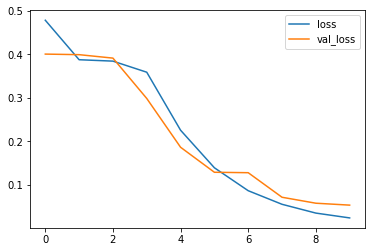

In [19]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

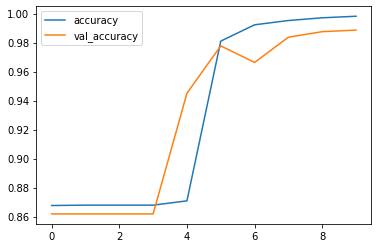

In [20]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()